In [4]:
import numpy as np
import os
from skimage.io import imread
from skimage.transform import resize

In [ ]:
img_path = "C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train/panda/253.jpeg"
img = imread(img_path)
img


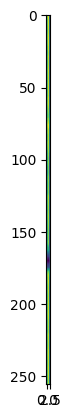

In [12]:
import matplotlib.pyplot as plt
myimg = img[1]
plt.imshow(myimg)

In [29]:
img.shape

(256, 256, 3)

In [30]:
img_resize = resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [31]:
#flatten the matrix
flatten_img = img_resize.flatten()
flatten_img

array([0.54176655, 0.75707151, 0.25247126, 0.54034761, 0.75576328,
       0.27527885, 0.51366676, 0.72447142, 0.21797775, 0.39981943,
       0.50448442, 0.23166568, 0.34821915, 0.41730676, 0.25255721,
       0.52668528, 0.69839474, 0.3000415 , 0.575114  , 0.7355934 ,
       0.36003783, 0.55435271, 0.71437855, 0.35174174, 0.41721099,
       0.55724142, 0.23722521, 0.21234669, 0.22779048, 0.18924987,
       0.29788449, 0.32804124, 0.25742111, 0.50843518, 0.68398327,
       0.26941427, 0.53414822, 0.73297186, 0.2937981 , 0.52879148,
       0.73031851, 0.27533217, 0.52741502, 0.72308742, 0.26752091,
       0.55173017, 0.76617015, 0.29419494, 0.55441997, 0.76865916,
       0.31485569, 0.51068568, 0.67819055, 0.28422046, 0.20774704,
       0.20422312, 0.16684947, 0.15231577, 0.14749888, 0.15084723,
       0.66949066, 0.71856134, 0.58246701, 0.88153165, 0.90578112,
       0.8135571 , 0.85932389, 0.87697068, 0.79155128, 0.44145553,
       0.43730782, 0.41341429, 0.09353987, 0.051351  , 0.12256

In [32]:
flatten_img.shape

(675,)

In [33]:
# read training imgs, convert into matrix store it into the list

train_dir = "C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train"
cl = ["panda", "not_panda"]

data = []
labels = []

for cl_indx, cl in enumerate(cl):
    for file in os.listdir(os.path.join(train_dir, cl)):
        img_path = os.path.join(train_dir, cl, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(cl_indx)

C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\251.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\252.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\253.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\254.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\255.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\256.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\257.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\258.jpeg
C:/Users/isach/OneDrive/Bureau/data science/S2/Machine Learning/datasets/panda_dataset/train\panda\259.jpeg
C:/Users/isach/OneDrive/Bure

In [41]:
data = np.asarray(data)
labels = np.asarray(labels)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [49]:
from sklearn.svm import SVC
svm_model = SVC()

In [50]:
svm_model.fit(x_train, y_train)

SVC()

In [51]:
y_pred = svm_model.predict(x_test)

In [52]:
#model evaluation

from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score

0.7540983606557377

In [ ]:
import joblib

# Save the model to a file
model_filename = "svm_model.pkl"
joblib.dump(svm_model, model_filename)
